$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 1: Linear Regression

*Xuehao(David) Hu*

##1 Overview

I am applying Linear Regression method on a sample dataset from UCL. Specifically, I am applying linear regression analysis on the sample datasets(mpg, cylinders, displacement, weight, acceleration, model year, origin) towards horsepower. it will extract a model w based on the trained set, which then can be used to predict horsepower based on future sample dataset. I am also exploring multiple ways to minimize the sum of squared errors so as to make model-predicted horsepower more close to actual horsepower.

##2 Method

####2.1 Description

Include latex math formulas defining the formula that is being minimized, and the matrix calculation for finding the weights.  Define in code cells the following functions as discussed in class.

Linear Structure
$$
\begin{align*}
   g(\xv;\wv) &= w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D \\
   &= w_0 + \sum_{i=1}^D w_i x_i \\
   & = \sum_{i=0}^D w_i x_i \mbox{, where } x_0 = 1 \\
   &= \wv^T \xv
\end{align*}
$$
(Given $N$ observations, $\xv_n$, for $n=1,\ldots,N$, and target values,
$t_n$, for $n=1,\ldots,N$, what is the simplest model,
$g(\xv)$)





Fitting Data Samples with Linear Model

In my opinion, what is want to achieve finally is that minimize(for all n) $$|t_n - g(\xv_n;\wv)$$

and the good practice to achieve it is  $$
    \wv_{\mbox{best}} = \argmin{\wv} \sum_{n=1}^N (t_n - g(x_n ; \wv))^2
$$
in which $$
    g(\xv;\wv) = w_0 + w_1 x
$$
and you take the derivative(gradient) with respect to $\wv$ to zero and solve for $\wv$

Doing it in matrixs makes it easy with python

Collect all targets into matrix $T$ and $x$ samples into matrix
$X$. ($N$=number samples, $D$=sample dimensionality)
$$
  \begin{align*}
    T &= \begin{bmatrix}
      t_1 \\ t_2 \\ \vdots \\ t_N
    \end{bmatrix} \\
    X &= \begin{bmatrix}
      x_{1,0} & x_{1,1} & x_{1,2} & \dotsc & x_{1,D} \\
      x_{2,0} & x_{2,1} & x_{2,2} & \dotsc & x_{2,D} \\
      \vdots \\
      x_{N,0} & x_{N,1} & x_{N,2} & \dotsc & x_{N,D}
    \end{bmatrix}\\
    \wv &= \begin{bmatrix} w_0 \\ w_1 \\ \vdots \\ w_D \end{bmatrix}
  \end{align*}
$$
If $g$ is an affine (linear + constant) function of $x$,
$$
    g(\xv;\wv) = w_0 + w_1 x
$$

Collection of all differences is $T - X\wv$, which is an $N \times
1$ matrix. 

To form the square of all values and add them up, just
do a dot product $(T-X\wv)^T (T-X\wv)$. (This only works if the value we are predicting is a scalar, which means $T$ is a column matrix.  If we want to predict more than one value for each sample, $T$ will have more than one column.)  
Let's continue with the derivation assuming $T$ has $K$ columns, meaning we want a linear model with $K$ outputs.

To find the best value for $\wv$, we take the derivative the the sum of squared error objective, set it equal to 0 and solve for $\wv$. 

$$
\begin{align*}
\frac{\partial \sum_{n=1}^N (\tv_n - g(\xv_n;\wv))^2}{\partial \wv} &= -2 \sum_{n=1}^N (\tv_n - g(\xv_n;\wv) \frac{\partial g(\xv_n;\wv)}{\partial \wv}\\
&= -2 \sum_{n=1}^N (\tv_n - \xv_n^T \wv) \frac{\partial \xv_n^T \wv}{\partial \wv}\\
&= -2 \sum_{n=1}^N (\tv_n - \xv_n^T \wv) \xv_n^T
\end{align*}
$$

Here's where we get the benefit of expressing the $\xv_n$ and $t_n$ samples as matrices. The sum can be performed with a dot product:

$$
\begin{align*}
\frac{\partial \sum_{n=1}^N (\tv_n - g(\xv_n;\wv))^2}{\partial \wv} 
&= -2 \sum_{n=1}^N (\tv_n - \xv_n^T \wv) \xv_n^T\\
&= -2 \Xv^T (\Tv - \Xv \wv)
\end{align*}
$$

Check the sizes and shapes of each matrix in the last equation above.

Now we can set this equal to zero and solve for $\wv$.

$$
\begin{align*}
-2 \Xv^T (\Tv - \Xv \wv) &= 0\\
\Xv^T (\Tv - \Xv \wv) &= 0\\
\Xv^T \Tv &= \Xv^T \Xv \wv\\
\wv &= (\Xv^T \Xv)^{-1} \Xv^T \Tv
\end{align*}
$$

And, in python

    w = np.dot( np.linalg.inv(np.dot(X.T, X)), np.dot(X.T,T) )

or, you may use the *solve* function that assumes $\Xv^T \Xv$ is full rank (no linearly dependent columns),

    w = np.linalg.solve(np.dot(X.T,X), np.dot(X.T, T))

or, better yet, use the *lstsq* function that does not make that assumption. 

    w = np.linalg.lstsq(np.dot(X.T,X), np.dot(X.T, T))
[CITE: Above is mostly based on Prof.Chuck Anderson's notebook from his Machine learning class that I am taking](http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs480/notebooks/03%20Linear%20Regression.ipynb)


Here, for training, and testing, where will be following functions:

  * ```model = train(X,T)```
  * ```predict = use(X,model)```
  * ```error = rmse(predict,T)```
  
Let ```X``` be a two-dimensional matrix (```np.array```) with each row containing one data sample, and ```T``` be a two-dimensional matrix of one column containing the target values for each sample in ```X```.  So, ```X.shape[0]``` is equal to ```T.shape[0]```.  Function call ```train(X,T)``` will return a dictionary with the keys ```means```, ```stds```, and ```w```.
[CITE: This is mostly the assignment description from Prof.Chuck Anderson's Machine Learning class](http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs480/notebooks/03%20Linear%20Regression.ipynb)

####2.2 Import libraries

In [475]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

####2.3 model = train(X,T)

In [476]:
def train(X,T):
    means = X.mean(axis=0)
    stds= X.std(axis=0)
    Xs = (X - means)/stds
    Xs1= np.hstack((np.ones((Xs.shape[0],1)), Xs))
    w = np.linalg.lstsq(np.dot(Xs1.T,Xs1),np.dot(Xs1.T,T))[0]
    model = {'means':means,'stds':stds,'w':w}
    return model

####2.4 predict = use(X,model)

In [477]:
def use(X,model):
    Xs = (X-model['means'])/model['stds']
    Xs1 = np.hstack((np.ones((Xs.shape[0],1)), Xs))
    predict = np.dot(Xs1,model['w'])
    return predict

####2.5 predict = rmse(X,model) 

In [478]:
def rmse(predict,T):
    rmseValue = np.sqrt(np.mean((predict-T)**2))
    return rmseValue

##3 Data

####3.1 Data Title:    
        Auto-Mpg Data & Auto-Mpg Names

####3.2 Data Source:     
        [UCL Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Auto+MPG) 

#### 3.3 Data Shape:        
        398(rows) X 9 (colomns)

####3.4  Data Attribute Info:
        1. mpg:           continuous
        2. cylinders:     multi-valued discrete
        3. displacement:  continuous
        4. horsepower:    continuous (has 6 missing values)
        5. weight:        continuous
        6. acceleration:  continuous
        7. model year:    multi-valued discrete
        8. origin:        multi-valued discrete
        9. car name:      string (unique for each instance)
        
Describe the data you use in your example application.  Mention the source, and the names and meanings of each attribute. Include some plots of the data. Describe some observations you make about the plots.


####3.5 load and clean data

Convert question mark(?) to nan. Referenced from Prof.Chuck Anderson's [missingIsNan(s)](http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs480/notebooks/03%20Linear%20Regression.ipynb)

In [479]:
def nanConverter(s):
    return np.nan if s == b'?' else float(s)

load auto-mpg.data, and use first 8 columns

In [480]:
data = np.loadtxt('auto-mpg.data', usecols=range(8), converters={3: nanConverter})

Remove lines that are missing horsepower. Referenced Prof.Chuck Anderson's [Notebook](http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs480/notebooks/03%20Linear%20Regression.ipynb)

In [481]:
isNanArray = np.isnan(data)
goodRowsMask = np.logical_not(isNanArray.any(axis=1))
dataCleaned = data[goodRowsMask,:]

####3.4 Train Sample and Target 

Swap horsepower and mpg column, which reduce this analysis to class example

In [482]:
dataCleaned[:,[0,3]] = dataCleaned[:,[3,0]]

Target:  horsepower

In [483]:
T=dataCleaned[:,0:1]

Sample:  mpg, cylinders, displacement, weight, acceleration, model year, origin

In [484]:
X=dataCleaned[:,1:]

####3.5 Visualize the loaded data

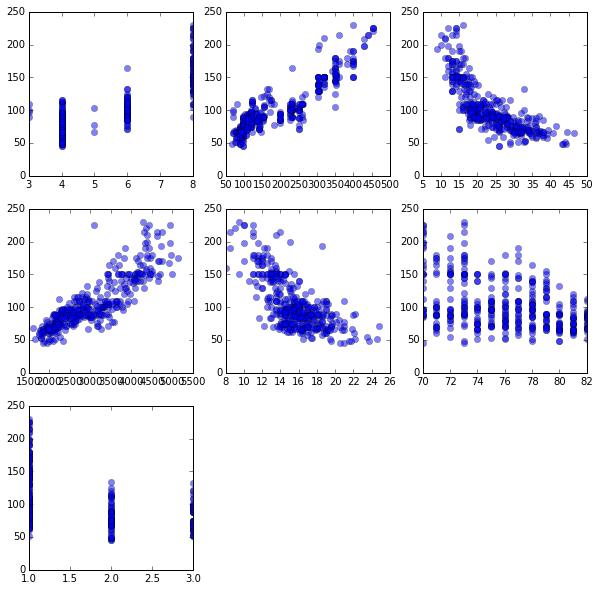

In [485]:
plt.figure(figsize=(10,10))
for s in range(X.shape[1]):
    plt.subplot(3,3,s+1)
    plt.plot(X[:,s],T,'o',alpha=0.5)

## 4 Results

####4.1 Add helper Info

In [486]:
names = ['horsepower','cylinders','displacement','mpg','weight',
          'acceleration','year','origin']
Xnames = names[0:3]+names[4:]
Tname = names[3]

Update name for the first column

In [487]:
Xnames=['bias','cylinders','displacement','mpg','weight',
          'acceleration','year','origin']

####4.2 Apply the data set to train() to build the model, and plot the predicts

In [495]:
model = train(X,T)

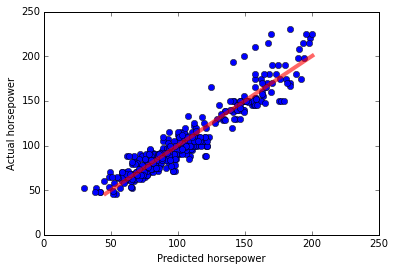

In [512]:
predict = use(X,model)
actual = T

predict1 = predict #save the predict for future use

plt.plot(predict,actual,'o')
plt.xlabel('Predicted horsepower')
plt.ylabel('Actual horsepower')
#add a 45% line
a = max(min(predict),min(actual))
b = min (max(predict),max(actual))
plt.plot([a,b],[a,b],'r',linewidth=4,alpha=0.6);

obviously the predicted horsepower is very close to actual horsepower (since we are using all training samples to test our model)

####4.1 Show the Weights,Ranges,Min,Max and discuss to find the least relevant

In [505]:
X1 = np.hstack((np.ones((X.shape[0],1)), X))
print('{:14s}'.format('name          weight      range(max-min)  min     max    weight/range'))
for weight,name,mn,mx in zip(model['w'].flat,Xnames,
    np.min(X1,axis=0),np.max(X1,axis=0)):
    if(mx==mn):
        print('{:13s}{:9.4f}{:13.2f}{:10.2f}{:8.2f}{:12.2f}'.
        format(name,weight,mx-mn,mn,mx,np.nan))
    else:
        print('{:13s}{:9.4f}{:13.2f}{:10.2f}{:8.2f}{:12.2f}'.
        format(name,weight,mx-mn,mn,mx,weight/(mx-mn)))

name          weight      range(max-min)  min     max    weight/range
bias          104.4694         0.00      1.00    1.00         nan
cylinders      -5.0675         5.00      3.00    8.00       -1.01
displacement   17.1228       387.00     68.00  455.00        0.04
mpg            -1.8032        37.60      9.00   46.60       -0.05
weight         16.8967      3527.00   1613.00 5140.00        0.00
acceleration  -12.1061        16.80      8.00   24.80       -0.72
year           -2.3755        12.00     70.00   82.00       -0.20
origin          4.0524         2.00      1.00    3.00        2.03


Since the weight magnitude for each name is not only decided by the linear relationship between them and taget, but also decided by each input's range. Therefore, we standardized the input variable by adjusting the values to have zero mean and unit variance to reduce the effect of the range on the weight of input in bothe train(X,T) and use(X,model) .[CITE from Prof.Anderson's notebook](http://localhost:8889/notebooks/cs480/03%20Linear%20Regression.ipynb)

Based on the result above, I would believe that acceleration and origin is less relevant to horsepower since acceleration itself is kind of same thing as horsepower, and origin is less relevant by common sense.

Remove origin and acceleration,re-build the model

In [509]:
XnamesNew = ['bias','cylinders','displacement','mpg','weight','year']
Xnew = np.delete(X,6,1)
Xnew = np.delete(Xnew,4,1)

modelNew = train(Xnew,T)

Plot the result and output the weights

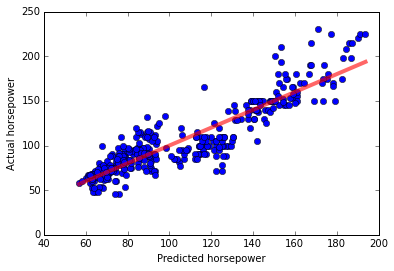

In [513]:
predict = use(Xnew,modelNew)
actual = T

predict2 = predict

plt.plot(predict,actual,'o')
plt.xlabel('Predicted horsepower')
plt.ylabel('Actual horsepower')
#add a 45% line
a = max(min(predict),min(actual))
b = min (max(predict),max(actual))
plt.plot([a,b],[a,b],'r',linewidth=4,alpha=0.6);

Compare the two prediction and dicuss the improvement

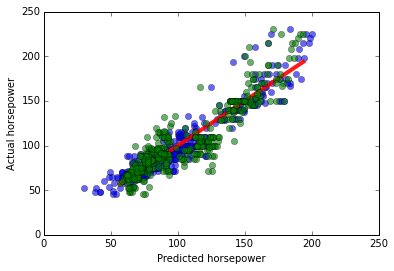

In [525]:
actual = T
plt.plot(predict1,actual,'o',alpha=0.6)
plt.xlabel('Predicted horsepower')
plt.ylabel('Actual horsepower')
#add a 45% line
a = max(min(predict),min(actual))
b = min (max(predict),max(actual))
plt.plot([a,b],[a,b],'r',linewidth=4,alpha=0.9);

plt.plot(predict2,actual,'o',alpha=0.6)
plt.xlabel('Predicted horsepower')
plt.ylabel('Actual horsepower')

So after we removed the origin and acceleration and rebuilding the model, we can tell form the plot that: from 50 to 130, all the predicted values are closer to actual values (as shown in the plot, they are closer to the red line). Therefore, removing the two variables helps improve the accuracy of our model. it is the same for a range of predicted values around 160.

However, we also notice that: from 120 ro 160(roughly), our predicted values are less closer to actual values(as shown in the plot, they are further away from the red line). It is probably that in this range, the horsepower are pretty influenced by the two variables we just removed. 

Therefore, further work can find out how acceration and origin are influencing the horsepower from 120 to 160 (roughly).  

## Grading

Your notebook will be run and graded automatically.  After running all of the above cells in your notebook, run the code in the following cell to demonstrate an example grading session.  You should see a perfect score of 100/100 if your functions are defined correctly.

In [473]:
%run -i A1\ Grader.py

20/20 points. 'means' values are correct.
20/20 points. 'stds' values are correct.
20/20 points. 'w' values are correct.
20/20 points. Values returned by 'use' are correct.
20/20 points. rmse() is correct.
A1 Grade is 100/100
